In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from PIL import Image
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import seaborn as sns
from tensorflow.keras.regularizers import l2



In [4]:
# Define paths
train_dir = '/content/drive/MyDrive/Food101_dataset/data/food-101-tiny/train'
val_dir = '/content/drive/MyDrive/Food101_dataset/data/food-101-tiny/valid'

In [59]:
# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [60]:

# Load images
train_data = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode = 'categorical'
                                                  )

val_data = validation_datagen.flow_from_directory(val_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode = 'categorical'
                                                 )

Found 640 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_1 = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=20,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)


Epoch 1/20
20/20 [==============================] - 63s 3s/step - loss: 1.2939 - accuracy: 0.4672 - val_loss: 7.1207 - val_accuracy: 0.2250
Epoch 2/20
20/20 [==============================] - 60s 3s/step - loss: 1.3236 - accuracy: 0.4766 - val_loss: 8.2233 - val_accuracy: 0.2146
Epoch 3/20
20/20 [==============================] - 54s 3s/step - loss: 1.2805 - accuracy: 0.4734 - val_loss: 7.9076 - val_accuracy: 0.2292
Epoch 4/20
20/20 [==============================] - 55s 3s/step - loss: 1.3197 - accuracy: 0.4500 - val_loss: 7.5935 - val_accuracy: 0.2333
Epoch 5/20
20/20 [==============================] - 55s 3s/step - loss: 1.2541 - accuracy: 0.4828 - val_loss: 10.0337 - val_accuracy: 0.2229
Epoch 6/20
20/20 [==============================] - 51s 3s/step - loss: 1.2641 - accuracy: 0.4750 - val_loss: 9.5988 - val_accuracy: 0.2292
Epoch 7/20
20/20 [==============================] - 54s 3s/step - loss: 1.2429 - accuracy: 0.4859 - val_loss: 7.4126 - val_accuracy: 0.2521
Epoch 8/20
20/20 [=

20/20 [==============================] - 19s 963ms/step - loss: 0.9220 - accuracy: 0.6594
train accuracy: 65.94%
Validation accuracy: 28.60%


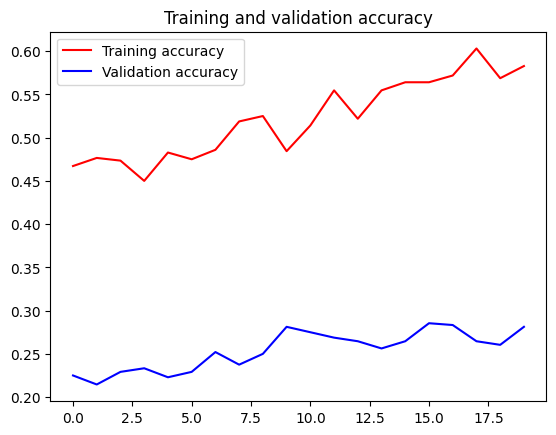

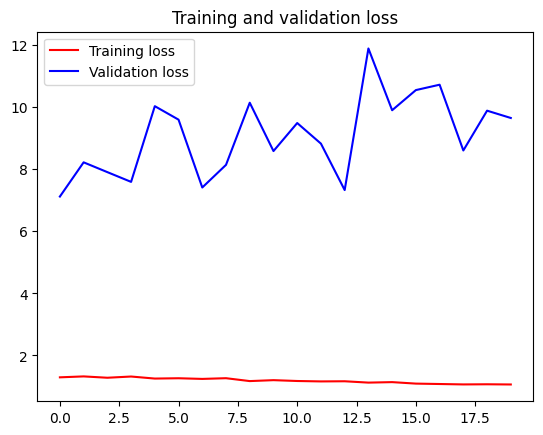

In [34]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_data)
train_loss, train_accuracy = model.evaluate(train_data)
print(f'train accuracy: {train_accuracy*100:.2f}%')
print(f'Validation accuracy: {val_accuracy*100:.2f}%')


# Plot the training history_1
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


16/16 [==============================] - 11s 671ms/step


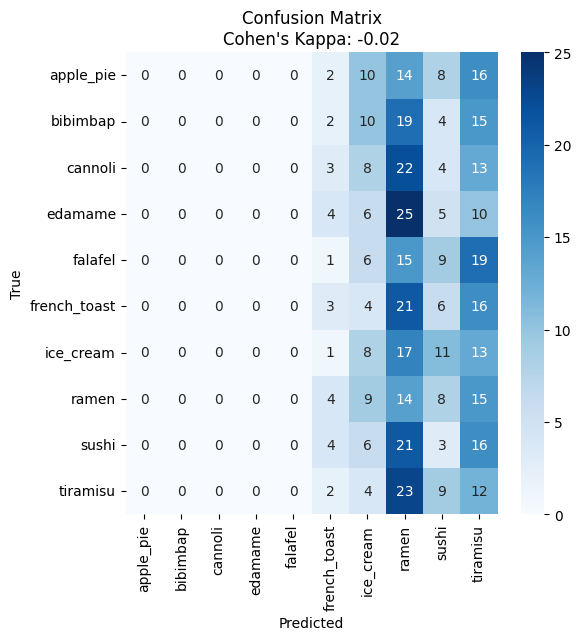

In [37]:
# Predict classes on the validation set
val_data.reset()
predictions = model.predict(val_data, steps=val_data.samples // val_data.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes from the validation set
true_classes = val_data.classes
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Compute Cohen's Kappa value
kappa = cohen_kappa_score(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nCohen\'s Kappa: {kappa:.2f}')
plt.show()

In [36]:
model_3 = Sequential([
    Conv2D(32, (3, 3),  input_shape=(150, 150, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_3 = model_3.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=20,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)


Epoch 1/20
20/20 [==============================] - 79s 4s/step - loss: 9.0246 - accuracy: 0.1937 - val_loss: 6.8160 - val_accuracy: 0.1083
Epoch 2/20
20/20 [==============================] - 75s 4s/step - loss: 3.2105 - accuracy: 0.2375 - val_loss: 2.8385 - val_accuracy: 0.1042
Epoch 3/20
20/20 [==============================] - 74s 4s/step - loss: 1.9997 - accuracy: 0.2828 - val_loss: 2.5400 - val_accuracy: 0.0938
Epoch 4/20
20/20 [==============================] - 74s 4s/step - loss: 1.8462 - accuracy: 0.2625 - val_loss: 2.5520 - val_accuracy: 0.1104
Epoch 5/20
20/20 [==============================] - 79s 4s/step - loss: 1.6973 - accuracy: 0.2734 - val_loss: 2.9930 - val_accuracy: 0.1000
Epoch 6/20
20/20 [==============================] - 77s 4s/step - loss: 1.7114 - accuracy: 0.2656 - val_loss: 3.0648 - val_accuracy: 0.1104
Epoch 7/20
20/20 [==============================] - 76s 4s/step - loss: 1.6440 - accuracy: 0.3063 - val_loss: 3.7508 - val_accuracy: 0.0979
Epoch 8/20
20/20 [==

20/20 [==============================] - 20s 953ms/step - loss: 1.6328 - accuracy: 0.3125
train accuracy: 31.25%
Validation accuracy: 15.80%


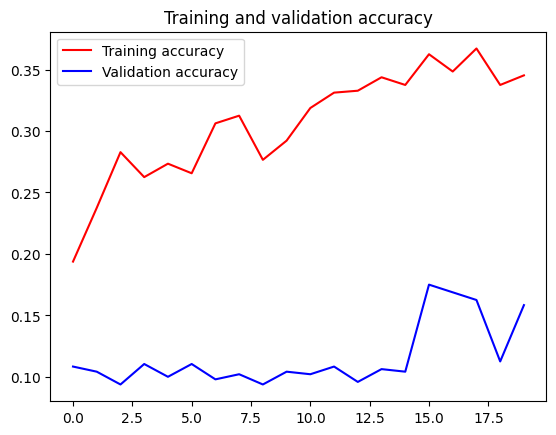

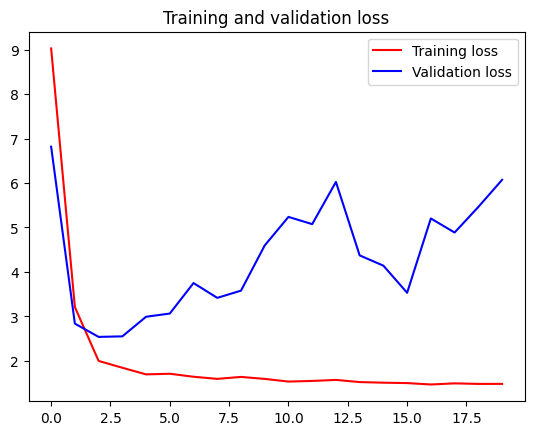

In [40]:
# Evaluate the model
val_loss, val_accuracy = model_3.evaluate(val_data)
train_loss, train_accuracy = model_3.evaluate(train_data)
print(f'train accuracy: {train_accuracy*100:.2f}%')
print(f'Validation accuracy: {val_accuracy*100:.2f}%')

# Plot the training history
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

16/16 [==============================] - 16s 961ms/step


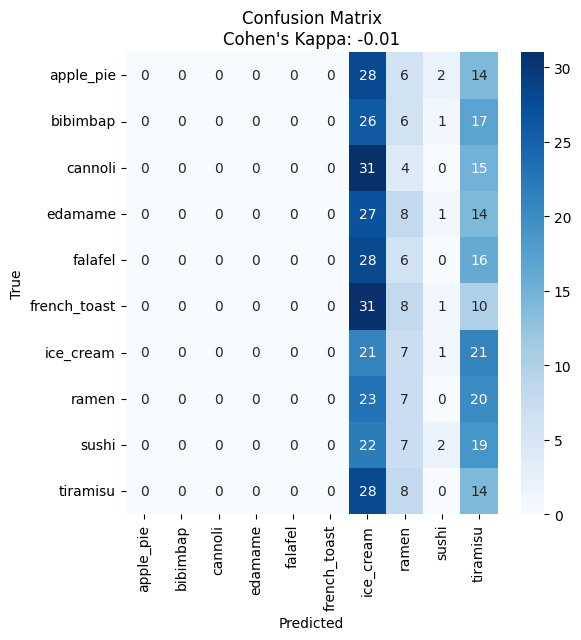

In [38]:
# Predict classes on the validation set
val_data.reset()
predictions = model_3.predict(val_data, steps=val_data.samples // val_data.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes from the validation set
true_classes = val_data.classes
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Compute Cohen's Kappa value
kappa = cohen_kappa_score(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nCohen\'s Kappa: {kappa:.2f}')
plt.show()

In [12]:
model_2 = Sequential([
    Conv2D(32, (3, 3),  input_shape=(150, 150, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model_2.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=30,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)

Epoch 1/30
20/20 [==============================] - 264s 13s/step - loss: 15.4104 - accuracy: 0.2422 - val_loss: 8.8552 - val_accuracy: 0.1187
Epoch 2/30
20/20 [==============================] - 70s 4s/step - loss: 8.8234 - accuracy: 0.2859 - val_loss: 8.8278 - val_accuracy: 0.1042
Epoch 3/30
20/20 [==============================] - 82s 4s/step - loss: 4.0533 - accuracy: 0.2953 - val_loss: 4.7233 - val_accuracy: 0.0979
Epoch 4/30
20/20 [==============================] - 80s 4s/step - loss: 1.9246 - accuracy: 0.3000 - val_loss: 3.2137 - val_accuracy: 0.1042
Epoch 5/30
20/20 [==============================] - 79s 4s/step - loss: 1.5731 - accuracy: 0.3375 - val_loss: 4.5297 - val_accuracy: 0.1042
Epoch 6/30
20/20 [==============================] - 80s 4s/step - loss: 1.5237 - accuracy: 0.3141 - val_loss: 4.8055 - val_accuracy: 0.1354
Epoch 7/30
20/20 [==============================] - 79s 4s/step - loss: 1.4568 - accuracy: 0.3750 - val_loss: 5.2100 - val_accuracy: 0.0958
Epoch 8/30
20/20 

In [14]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_8 (Bat  (None, 148, 148, 32)      128       
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 72, 72, 64)       

20/20 [==============================] - 20s 966ms/step - loss: 1.2666 - accuracy: 0.4891
train accuracy: 48.91%
Validation accuracy: 23.40%


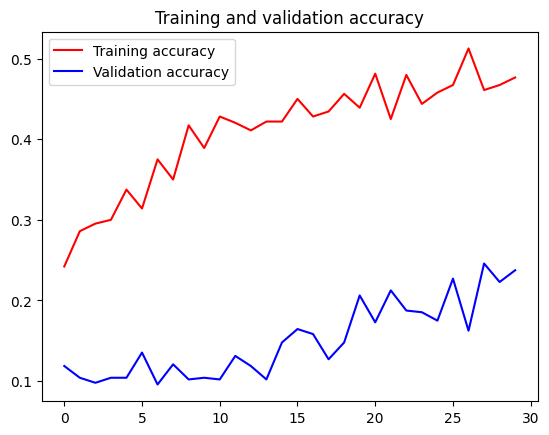

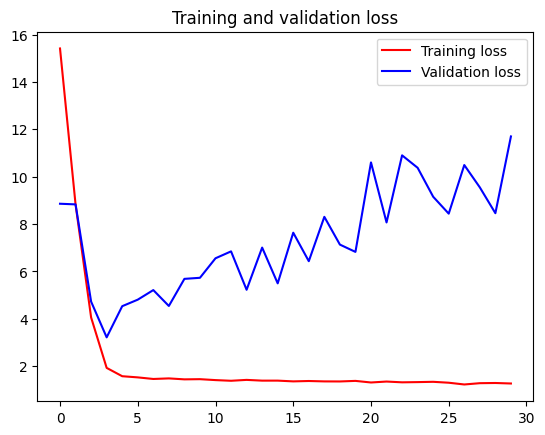

In [17]:
# Evaluate the model
val_loss, val_accuracy = model_2.evaluate(val_data)
train_loss, train_accuracy = model_2.evaluate(train_data)
print(f'train accuracy: {train_accuracy*100:.2f}%')
print(f'Validation accuracy: {val_accuracy*100:.2f}%')


# Plot the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

16/16 [==============================] - 11s 572ms/step


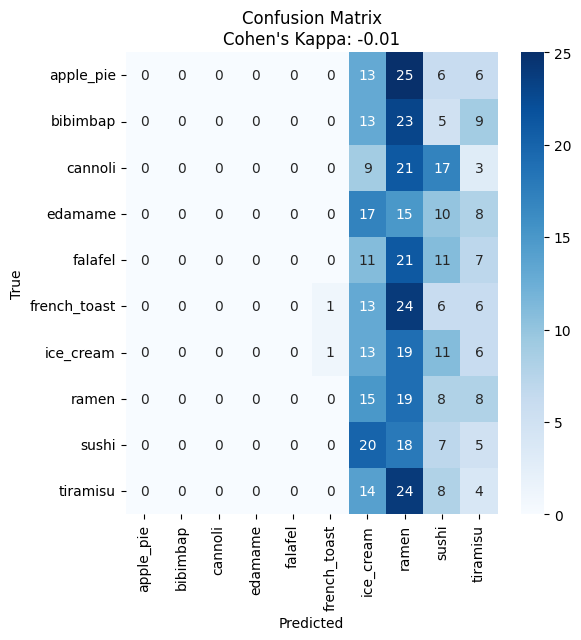

In [25]:
# Predict classes on the validation set
val_data.reset()
predictions = model.predict(val_data, steps=val_data.samples // val_data.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes from the validation set
true_classes = val_data.classes
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Compute Cohen's Kappa value
kappa = cohen_kappa_score(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nCohen\'s Kappa: {kappa:.2f}')
plt.show()

In [41]:
model_4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_4 = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=30,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)


Epoch 1/30
20/20 [==============================] - 51s 2s/step - loss: 0.9962 - accuracy: 0.5922 - val_loss: 9.2342 - val_accuracy: 0.2792
Epoch 2/30
20/20 [==============================] - 54s 3s/step - loss: 0.9891 - accuracy: 0.6000 - val_loss: 9.4087 - val_accuracy: 0.2896
Epoch 3/30
20/20 [==============================] - 53s 3s/step - loss: 0.9965 - accuracy: 0.6031 - val_loss: 15.3847 - val_accuracy: 0.2771
Epoch 4/30
20/20 [==============================] - 55s 3s/step - loss: 1.0231 - accuracy: 0.5891 - val_loss: 11.1407 - val_accuracy: 0.2646
Epoch 5/30
20/20 [==============================] - 52s 3s/step - loss: 0.9974 - accuracy: 0.6031 - val_loss: 9.6720 - val_accuracy: 0.3083
Epoch 6/30
20/20 [==============================] - 61s 3s/step - loss: 1.0361 - accuracy: 0.6031 - val_loss: 8.6588 - val_accuracy: 0.3167
Epoch 7/30
20/20 [==============================] - 50s 3s/step - loss: 0.9920 - accuracy: 0.6078 - val_loss: 15.5052 - val_accuracy: 0.2958
Epoch 8/30
20/20 

20/20 [==============================] - 17s 817ms/step - loss: 2.2775 - accuracy: 0.0672
train accuracy: 6.72%
Validation accuracy: 11.20%


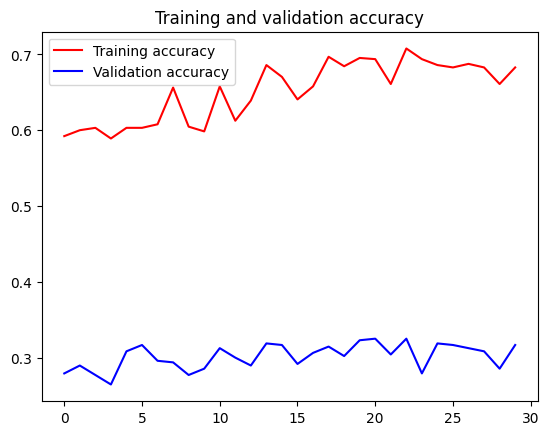

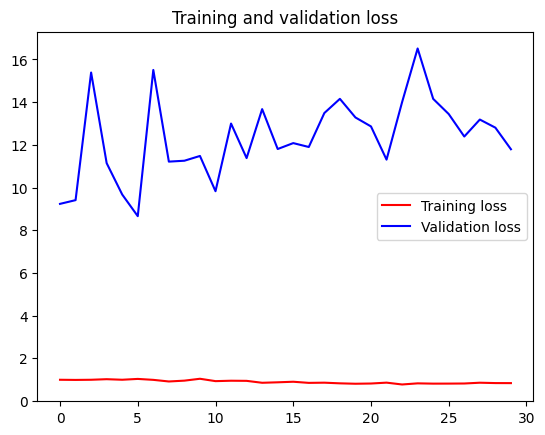

In [43]:
# Evaluate the model
val_loss, val_accuracy = model_4.evaluate(val_data)
train_loss, train_accuracy = model_4.evaluate(train_data)
print(f'train accuracy: {train_accuracy*100:.2f}%')
print(f'Validation accuracy: {val_accuracy*100:.2f}%')


# Plot the training history
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

16/16 [==============================] - 17s 1s/step


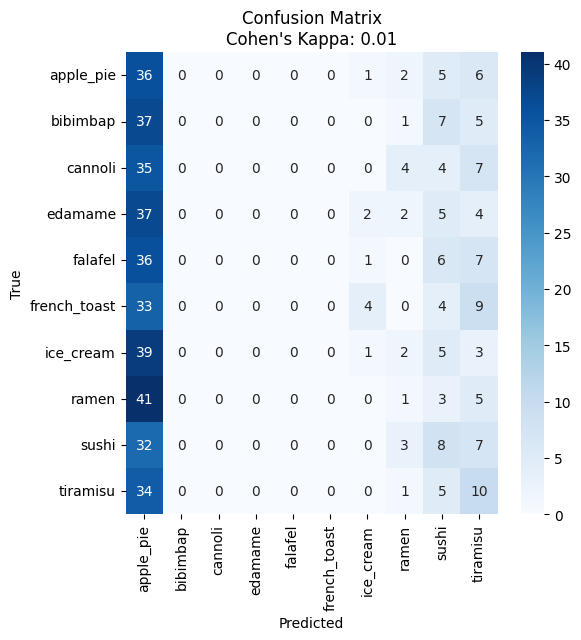

In [44]:
# Predict classes on the validation set
val_data.reset()
predictions = model_4.predict(val_data, steps=val_data.samples // val_data.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes from the validation set
true_classes = val_data.classes
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Compute Cohen's Kappa value
kappa = cohen_kappa_score(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nCohen\'s Kappa: {kappa:.2f}')
plt.show()

In [45]:
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 17, 17, 128)      

In [46]:
model_5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model_5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_5 = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=20,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)


Epoch 1/20
20/20 [==============================] - 60s 3s/step - loss: 0.7162 - accuracy: 0.7406 - val_loss: 15.8275 - val_accuracy: 0.3333
Epoch 2/20
20/20 [==============================] - 51s 3s/step - loss: 0.7829 - accuracy: 0.7016 - val_loss: 14.7689 - val_accuracy: 0.3167
Epoch 3/20
20/20 [==============================] - 50s 3s/step - loss: 0.7536 - accuracy: 0.7109 - val_loss: 14.0236 - val_accuracy: 0.3250
Epoch 4/20
20/20 [==============================] - 53s 3s/step - loss: 0.7283 - accuracy: 0.7437 - val_loss: 14.9477 - val_accuracy: 0.3229
Epoch 5/20
20/20 [==============================] - 52s 3s/step - loss: 0.7060 - accuracy: 0.7141 - val_loss: 13.2752 - val_accuracy: 0.3063
Epoch 6/20
20/20 [==============================] - 51s 3s/step - loss: 0.6969 - accuracy: 0.7469 - val_loss: 16.6970 - val_accuracy: 0.3083
Epoch 7/20
20/20 [==============================] - 51s 3s/step - loss: 0.6847 - accuracy: 0.7391 - val_loss: 13.3627 - val_accuracy: 0.3250
Epoch 8/20
20

In [47]:
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 17, 17, 64)       

20/20 [==============================] - 17s 857ms/step - loss: 2.2995 - accuracy: 0.1266
train accuracy: 12.66%
Validation accuracy: 10.80%


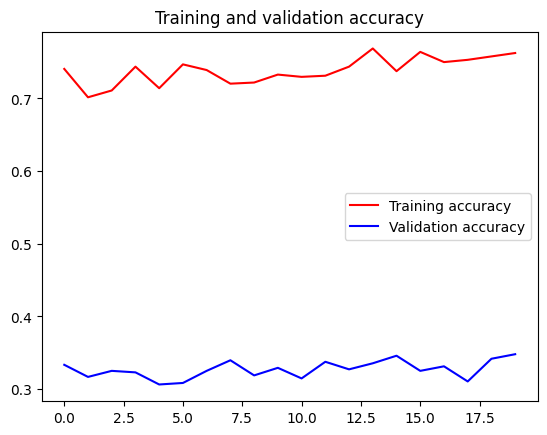

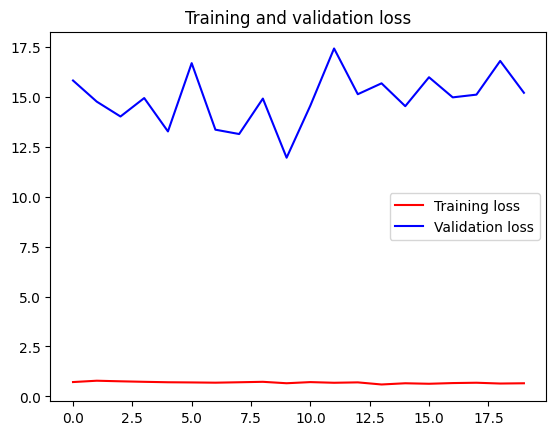

In [48]:
# Evaluate the model
val_loss, val_accuracy = model_5.evaluate(val_data)
train_loss, train_accuracy = model_5.evaluate(train_data)
print(f'train accuracy: {train_accuracy*100:.2f}%')
print(f'Validation accuracy: {val_accuracy*100:.2f}%')


# Plot the training history
acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

16/16 [==============================] - 10s 581ms/step


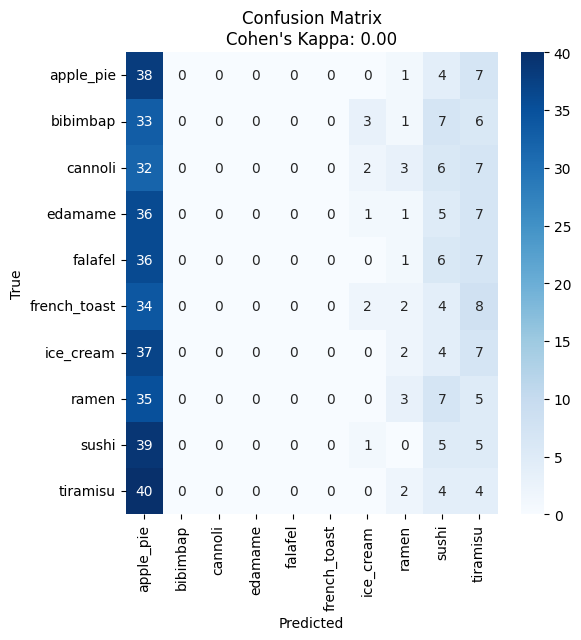

In [49]:
# Predict classes on the validation set
val_data.reset()
predictions = model_4.predict(val_data, steps=val_data.samples // val_data.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes from the validation set
true_classes = val_data.classes
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Compute Cohen's Kappa value
kappa = cohen_kappa_score(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nCohen\'s Kappa: {kappa:.2f}')
plt.show()

In [53]:
model_6 = Sequential([
    Conv2D(32, (3, 3),  input_shape=(150, 150, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_6.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_6 = model_6.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=50,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)



Epoch 1/50
20/20 [==============================] - 54s 3s/step - loss: 16.0428 - accuracy: 0.2375 - val_loss: 6.5858 - val_accuracy: 0.1000
Epoch 2/50
20/20 [==============================] - 47s 2s/step - loss: 4.4884 - accuracy: 0.2781 - val_loss: 2.5066 - val_accuracy: 0.1063
Epoch 3/50
20/20 [==============================] - 46s 2s/step - loss: 1.7794 - accuracy: 0.3047 - val_loss: 2.8575 - val_accuracy: 0.0917
Epoch 4/50
20/20 [==============================] - 49s 2s/step - loss: 1.6381 - accuracy: 0.3125 - val_loss: 3.4472 - val_accuracy: 0.1167
Epoch 5/50
20/20 [==============================] - 47s 2s/step - loss: 1.5669 - accuracy: 0.3156 - val_loss: 3.9244 - val_accuracy: 0.1437
Epoch 6/50
20/20 [==============================] - 46s 2s/step - loss: 1.5717 - accuracy: 0.3141 - val_loss: 3.9714 - val_accuracy: 0.1292
Epoch 7/50
20/20 [==============================] - 50s 2s/step - loss: 1.5332 - accuracy: 0.3187 - val_loss: 4.3521 - val_accuracy: 0.1125
Epoch 8/50
20/20 [=

In [55]:
model_6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_20 (Ba  (None, 148, 148, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_20 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_21 (Ba  (None, 72, 72, 32)      

20/20 [==============================] - 18s 836ms/step - loss: 1.2970 - accuracy: 0.4547
train accuracy: 45.47%
Validation accuracy: 19.20%


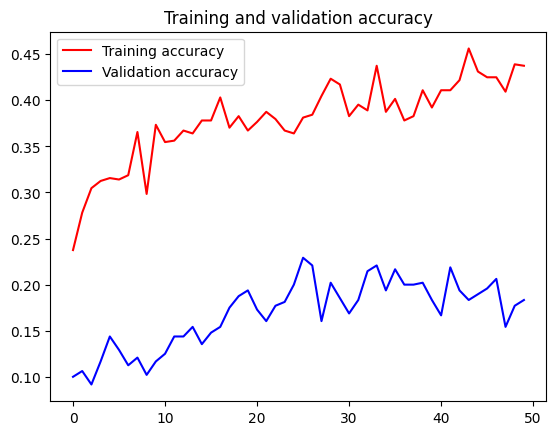

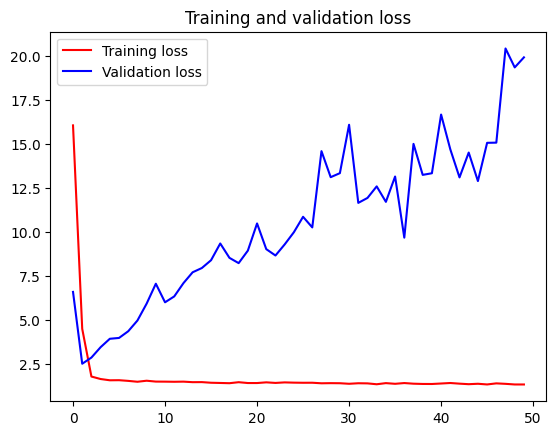

In [56]:
# Evaluate the model
val_loss, val_accuracy = model_6.evaluate(val_data)
train_loss, train_accuracy = model_6.evaluate(train_data)
print(f'train accuracy: {train_accuracy*100:.2f}%')
print(f'Validation accuracy: {val_accuracy*100:.2f}%')


# Plot the training history
acc = history_6.history['accuracy']
val_acc = history_6.history['val_accuracy']
loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

16/16 [==============================] - 13s 781ms/step


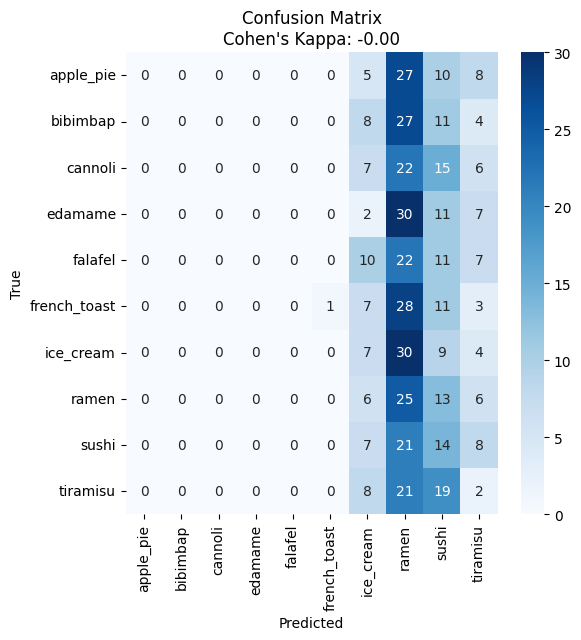

In [57]:
# Predict classes on the validation set
val_data.reset()
predictions = model_6.predict(val_data, steps=val_data.samples // val_data.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes from the validation set
true_classes = val_data.classes
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Compute Cohen's Kappa value
kappa = cohen_kappa_score(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nCohen\'s Kappa: {kappa:.2f}')
plt.show()

In [61]:
model_7 = Sequential([
    Conv2D(32, (3, 3),  input_shape=(150, 150, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model_7.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_7 = model_7.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=20,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)

Epoch 1/20
20/20 [==============================] - 51s 2s/step - loss: 3.2679 - accuracy: 0.2906 - val_loss: 2.7741 - val_accuracy: 0.1000
Epoch 2/20
20/20 [==============================] - 53s 3s/step - loss: 1.5318 - accuracy: 0.3656 - val_loss: 3.5437 - val_accuracy: 0.1000
Epoch 3/20
20/20 [==============================] - 48s 2s/step - loss: 1.4154 - accuracy: 0.4203 - val_loss: 4.6021 - val_accuracy: 0.0958
Epoch 4/20
20/20 [==============================] - 48s 2s/step - loss: 1.3438 - accuracy: 0.4672 - val_loss: 5.3999 - val_accuracy: 0.1312
Epoch 5/20
20/20 [==============================] - 46s 2s/step - loss: 1.3747 - accuracy: 0.4266 - val_loss: 5.4820 - val_accuracy: 0.0979
Epoch 6/20
20/20 [==============================] - 45s 2s/step - loss: 1.2883 - accuracy: 0.4844 - val_loss: 6.0550 - val_accuracy: 0.1021
Epoch 7/20
20/20 [==============================] - 45s 2s/step - loss: 1.2761 - accuracy: 0.4781 - val_loss: 5.5201 - val_accuracy: 0.1125
Epoch 8/20
20/20 [==

In [63]:
model_7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_27 (Ba  (None, 148, 148, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_27 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_28 (Ba  (None, 72, 72, 32)      

20/20 [==============================] - 15s 763ms/step - loss: 1.3485 - accuracy: 0.4656
train accuracy: 46.56%
Validation accuracy: 23.60%


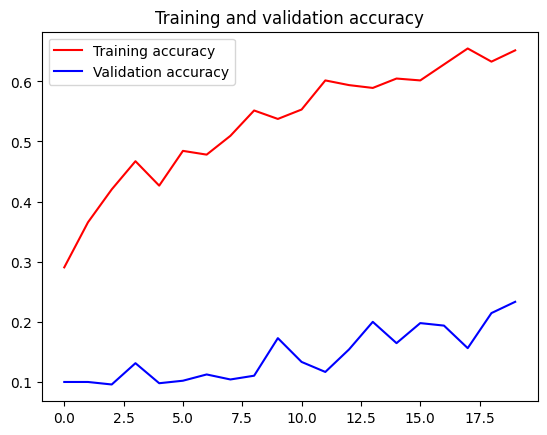

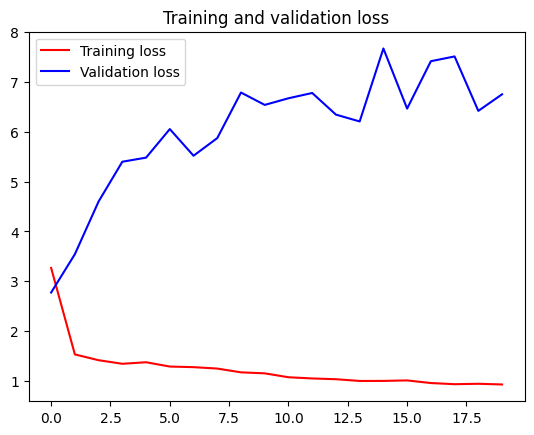

In [64]:
# Evaluate the model
val_loss, val_accuracy = model_7.evaluate(val_data)
train_loss, train_accuracy = model_7.evaluate(train_data)
print(f'train accuracy: {train_accuracy*100:.2f}%')
print(f'Validation accuracy: {val_accuracy*100:.2f}%')


# Plot the training history
acc = history_7.history['accuracy']
val_acc = history_7.history['val_accuracy']
loss = history_7.history['loss']
val_loss = history_7.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

16/16 [==============================] - 13s 723ms/step


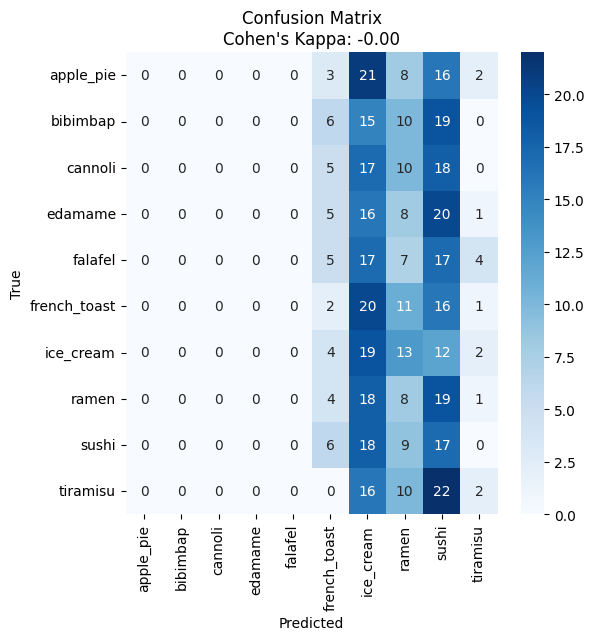

In [65]:
# Predict classes on the validation set
val_data.reset()
predictions = model_7.predict(val_data, steps=val_data.samples // val_data.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes from the validation set
true_classes = val_data.classes
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Compute Cohen's Kappa value
kappa = cohen_kappa_score(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nCohen\'s Kappa: {kappa:.2f}')
plt.show()

In [67]:
model_8 = Sequential([
    Conv2D(32, (3, 3),  input_shape=(150, 150, 3),kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3),kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3),kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3),kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

model_8.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history_8 = model_8.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=30,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)

Epoch 1/30
20/20 [==============================] - 53s 2s/step - loss: 11.9226 - accuracy: 0.3172 - val_loss: 12.4382 - val_accuracy: 0.1021
Epoch 2/30
20/20 [==============================] - 47s 2s/step - loss: 11.5506 - accuracy: 0.3641 - val_loss: 12.4530 - val_accuracy: 0.0979
Epoch 3/30
20/20 [==============================] - 46s 2s/step - loss: 11.2285 - accuracy: 0.4297 - val_loss: 12.4698 - val_accuracy: 0.1083
Epoch 4/30
20/20 [==============================] - 47s 2s/step - loss: 11.0217 - accuracy: 0.4375 - val_loss: 12.5274 - val_accuracy: 0.0979
Epoch 5/30
20/20 [==============================] - 46s 2s/step - loss: 10.7583 - accuracy: 0.4797 - val_loss: 12.5901 - val_accuracy: 0.1021
Epoch 6/30
20/20 [==============================] - 46s 2s/step - loss: 10.5272 - accuracy: 0.5156 - val_loss: 12.6888 - val_accuracy: 0.1146
Epoch 7/30
20/20 [==============================] - 48s 2s/step - loss: 10.3986 - accuracy: 0.4875 - val_loss: 12.7265 - val_accuracy: 0.1042
Epoch 

20/20 [==============================] - 15s 688ms/step - loss: 6.9172 - accuracy: 0.6578
train accuracy: 65.78%
Validation accuracy: 27.40%


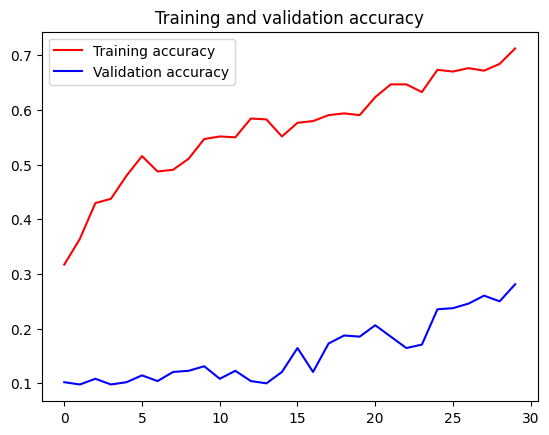

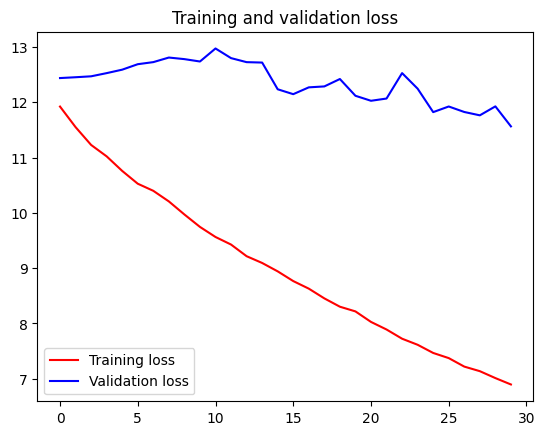

In [68]:
# Evaluate the model
val_loss, val_accuracy = model_8.evaluate(val_data)
train_loss, train_accuracy = model_8.evaluate(train_data)
print(f'train accuracy: {train_accuracy*100:.2f}%')
print(f'Validation accuracy: {val_accuracy*100:.2f}%')


# Plot the training history
acc = history_8.history['accuracy']
val_acc = history_8.history['val_accuracy']
loss = history_8.history['loss']
val_loss = history_8.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [69]:
model_8 = Sequential([
    Conv2D(32, (3, 3),  input_shape=(150, 150, 3),kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3),kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3),kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3),kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu',kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')
])

model_8.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history_8 = model_8.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=40,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size
)

Epoch 1/40
20/20 [==============================] - 49s 2s/step - loss: 2.9231 - accuracy: 0.3047 - val_loss: 3.3568 - val_accuracy: 0.1187
Epoch 2/40
20/20 [==============================] - 48s 2s/step - loss: 2.5029 - accuracy: 0.3891 - val_loss: 3.4776 - val_accuracy: 0.1000
Epoch 3/40
20/20 [==============================] - 45s 2s/step - loss: 2.4495 - accuracy: 0.4250 - val_loss: 3.6723 - val_accuracy: 0.1312
Epoch 4/40
20/20 [==============================] - 45s 2s/step - loss: 2.3793 - accuracy: 0.4406 - val_loss: 3.9078 - val_accuracy: 0.1125
Epoch 5/40
20/20 [==============================] - 45s 2s/step - loss: 2.3798 - accuracy: 0.4406 - val_loss: 4.0642 - val_accuracy: 0.1187
Epoch 6/40
20/20 [==============================] - 46s 2s/step - loss: 2.2961 - accuracy: 0.5063 - val_loss: 4.2788 - val_accuracy: 0.1042
Epoch 7/40
20/20 [==============================] - 45s 2s/step - loss: 2.2355 - accuracy: 0.4953 - val_loss: 4.4381 - val_accuracy: 0.1146
Epoch 8/40
20/20 [==

In [73]:
model_8.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_35 (Ba  (None, 148, 148, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_35 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_36 (Ba  (None, 72, 72, 32)      

20/20 [==============================] - 20s 996ms/step - loss: 1.7550 - accuracy: 0.6484
train accuracy: 64.84%
Validation accuracy: 27.40%


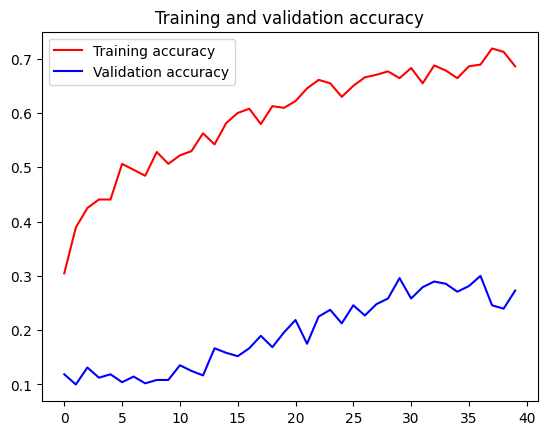

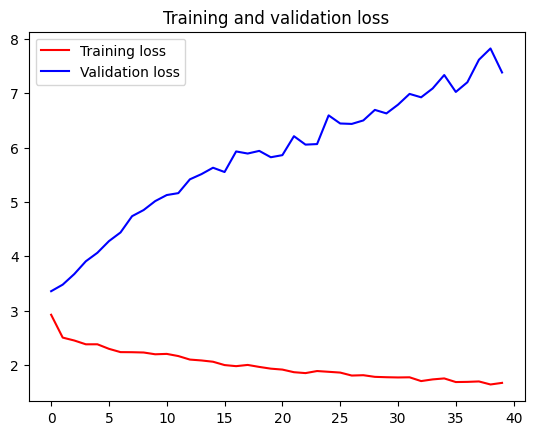

In [70]:
# Evaluate the model
val_loss, val_accuracy = model_8.evaluate(val_data)
train_loss, train_accuracy = model_8.evaluate(train_data)
print(f'train accuracy: {train_accuracy*100:.2f}%')
print(f'Validation accuracy: {val_accuracy*100:.2f}%')


# Plot the training history
acc = history_8.history['accuracy']
val_acc = history_8.history['val_accuracy']
loss = history_8.history['loss']
val_loss = history_8.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

16/16 [==============================] - 11s 671ms/step


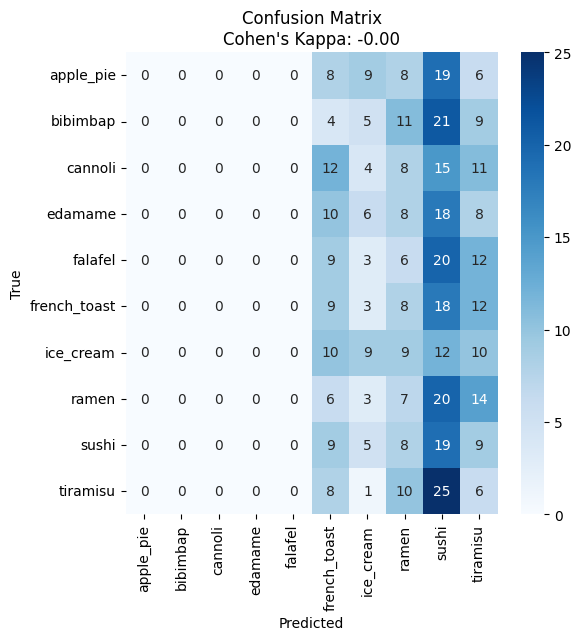

In [72]:
# Predict classes on the validation set
val_data.reset()
predictions = model_8.predict(val_data, steps=val_data.samples // val_data.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True classes from the validation set
true_classes = val_data.classes
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Compute Cohen's Kappa value
kappa = cohen_kappa_score(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nCohen\'s Kappa: {kappa:.2f}')
plt.show()